In [1]:
library(repr)
source('hmm_sample.R')

In [2]:
options(repr.plot.width=4, repr.plot.height=3)
set.seed(1)

In [3]:
nstates = 2
maxt = 500

# Settings for the latent state Markov Chain

In [4]:
iniprob = rep(0, nstates)
iniprob[1] = 1
print (iniprob)

[1] 1 0


latent state is random walk

In [5]:
transprob = matrix(rep(1, nstates^2), nrow=nstates)
transprob = transprob / rowSums(transprob)
print (transprob)

     [,1] [,2]
[1,]  0.5  0.5
[2,]  0.5  0.5


In [6]:
shapes = 50*(1:nstates)
scale = 1

In [7]:
truemodel = list('iniprob'=iniprob, 'transprob'=transprob, 'shapes'=shapes, 'scale'=scale)
save(truemodel, file='truemodel.RData')

## Generate samples from it

In [8]:
sampled = hmm_sample(maxt, iniprob, transprob, shapes, scale)
print (sampled)

$dat
  [1]  41  45 112  98 107  93  47  56 105  88 112  35  55 105 112  92  53  49
 [19] 118 103 102 106  87  51  47 100  40  90  52  54  63 124  54  89  40  88
 [37]  46  58 100  86 105  84  95  89 110  44  82  99  74  88  92  89  94  89
 [55] 113  41  98  46  89  55  55  60  90 110  47  34  91 134 123 111  92 110
 [73]  58  53  88  40 104 114 114  53  61  90  97 104 130  39  98  56  64  90
 [91]  44  55 109  48  55  34  45  87  55  52  97  38  48  39 106  53  91 123
[109] 127  38  64  41  50  90 100 117 135  42  52  41 107  35  35  89 114  49
[127]  99  44  60  38  63  42  84  96  57  44 114  53  97  55 111  90  35  86
[145]  37  45  83 129  57 112  84  68  33  34  47 107  35 117  92  41  54  66
[163]  88 113 127  83  65 109  67  66  38  51  89  47 116  63  47  52  83  34
[181] 104  43  44 100 107  51  47  42  90  80 103  52  98  50  53  95  88  77
[199]  50  64  60  49 103  47  46 110  44  44  52  36  83 111 123  42 104  99
[217]  91  38 104  93  39  47  65  85  90  79  45  43 125 1

In [9]:
countstrue = sampled$dat
latenttrue = sampled$latent

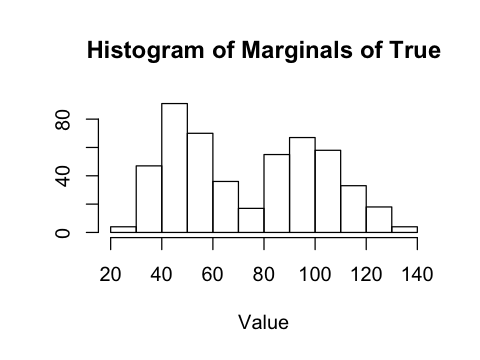

In [10]:
hist(countstrue, main='Histogram of Marginals of True', xlab='Value', ylab='')

# Some are unobserved due to reporting delay

The reporting delay distribution assumed to be known at this point. Typically this is fitted in a 2-stage approach where we estimate the reporting delay distribution and then fit the `ibnr-coxhmm` model. This is needed to find the thinning parameter `q_t` for the Reported Claims process.

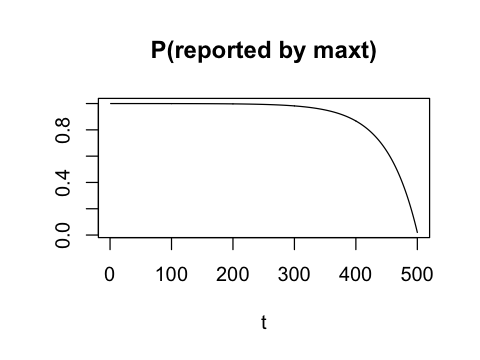

In [11]:
screpdel = maxt/10

scalemodrep = rep(1, maxt)
scalemodunrep = rep(1, maxt)

for (i in 1:maxt) {
    # probability that reporting delay for event at time i being reported by maxt
    probrep = pexp(maxt-i+1, rate=1/screpdel)
    scalemodrep[i] = probrep
    scalemodunrep[i] = 1-probrep
}

plot(scalemodrep, type='l', main='P(reported by maxt)', xlab='t', ylab='')

In [12]:
countsrep = rep(0, maxt)
countsunrep = rep(0, maxt)

for (i in 1:maxt) {
    repcounts = rbinom(1, size=countstrue[i], p=scalemodrep[i])
    countsrep[i] = repcounts
    countsunrep[i] = countstrue[i] - repcounts
}

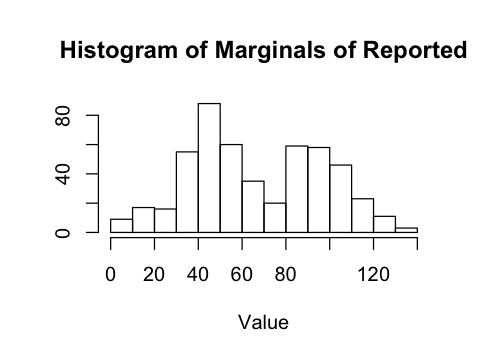

In [13]:
hist(countsrep, main='Histogram of Marginals of Reported', xlab='Value', ylab='')

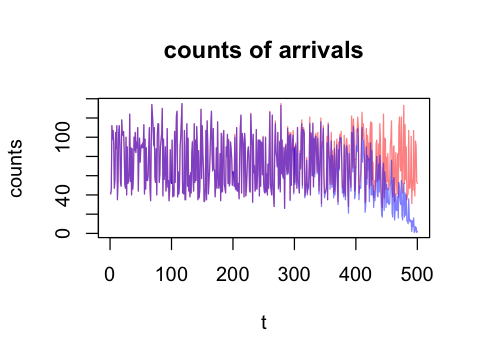

In [14]:
tvec = 1:maxt
plot(tvec, countstrue, type='l', col=rgb(1,0,0,.5), 
     ylim=range(c(countstrue, countsrep)),
     main='counts of arrivals',
     xlab='t', ylab='counts')
lines(tvec, countsrep, col=rgb(0,0,1,.5))

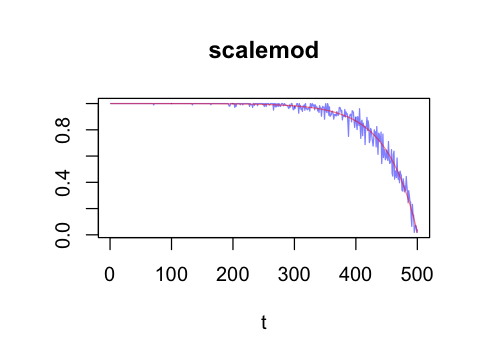

In [15]:
plot(tvec, countsrep/countstrue, type='l', col=rgb(0,0,1,.5), 
     main='thinning and reported/true ratio', xlab='t', ylab='')
lines(tvec, scalemodrep,col=rgb(1,0,0,.5))

In [16]:
dat = countsrep
dat_scalemodifier = scalemodrep
save(dat, dat_scalemodifier, file='dat.RData')

In [17]:
save(countstrue, latenttrue, file='true.RData')
save(countsrep, countsunrep, file='counts.RData')
save(scalemodrep, scalemodunrep, file='scalemod.RData')